In [92]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import re
import seaborn as sns

# LEITURA DOS DADOS

In [93]:
# Pasta contendo os arquivos JSON
pasta_keywords = 'keywords_k'

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Itera sobre os arquivos na pasta
for nome_arquivo in os.listdir(pasta_keywords):
    caminho_arquivo = os.path.join(pasta_keywords, nome_arquivo)

    try:
        # Extrai o valor de k do nome do arquivo
        match = re.search(r'keywords_k=(\d+)', nome_arquivo)
        if match:
            k_value = int(match.group(1))
        else:
            k_value = None

        # Leitura do arquivo JSON com o encoding utf-8-sig
        with open(caminho_arquivo, 'r', encoding='utf-8-sig') as f:
            data = json.load(f)

        # Extrai a lista de itens sob a chave 'items'
        items = data.get('network', {}).get('items', [])

        # Converte para DataFrame
        df = pd.json_normalize(items)

        # Adiciona uma coluna 'k' com o valor extraído do nome do arquivo
        df['k'] = k_value

        # Adiciona o DataFrame à lista
        dataframes.append(df)

        # Conta o número de clusters únicos para cada valor de k
        num_clusters = df['cluster'].nunique()

    except json.JSONDecodeError as e:
        print(f"Erro ao decodificar o JSON em {caminho_arquivo}: {e}")
    except Exception as e:
        print(f"Erro desconhecido em {caminho_arquivo}: {e}")

# Concatena todos os DataFrames em um único DataFrame
df_completo = pd.concat(dataframes, ignore_index=True)

#Ordena o DataFrame por k
df_completo.sort_values(by='k', inplace=True)

# imprimir a cabeça do dataframe
df_completo.head()

,id,label,x,y,cluster,weights.Links,weights.Total link strength,weights.Occurrences,scores.Avg. pub. year,scores.Avg. citations,scores.Avg. norm. citations,k
0,3,100 % reserves,1.0075,-0.1745,15,8.0,8.0,1.0,2017.0,3.0,0.8229,1
645,1494,p0,-0.7415,0.1297,7,8.0,8.0,1.0,2021.0,0.0,0.0000,1
646,1495,p00,-0.5293,0.2064,16,9.0,9.0,1.0,2019.0,7.0,2.1990,1
647,1496,p1,-0.4170,-0.0187,7,7.0,7.0,1.0,2021.0,0.0,0.0000,1
648,1498,p14,0.2940,0.5331,18,19.0,20.0,2.0,2021.0,0.5,0.2874,1


In [94]:
#Obter quantos k unicos existem no df_completo
kNumber = df_completo['k'].nunique()
kNumber

10

In [95]:
cluster_info = {}
for label in df_completo['label'].unique():
    # Filtra o DataFrame para o label específico
    label_df = df_completo[df_completo['label'] == label]

    for i in range(kNumber+1):
        clusteri = label_df[label_df['k'] == i]['cluster'].values[0] if label_df[label_df['k'] == i].shape[0] > 0 else 0
        cluster_info.setdefault(i, []).append(clusteri)

# Cria um DataFrame a partir do dicionário
df_cluster_info = pd.DataFrame(cluster_info)

#adicionar na coluna 0 o nome do label
df_cluster_info.insert(0, 'label', df_completo['label'].unique())

df_cluster_info

,label,0,1,2,3,4,5,6,7,8,9,10
0,100 % reserves,0,15,0,0,0,0,0,0,0,0,0
1,p0,0,7,0,0,0,0,0,0,0,0,0
2,p00,0,16,0,0,0,0,0,0,0,0,0
3,p1,0,7,0,0,0,0,0,0,0,0,0
4,p14,0,18,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,garrison,0,0,25,0,0,0,0,0,0,0,0
995,interpretive economics,0,0,8,0,0,0,0,0,0,0,0
996,foreign intervention,0,0,3,0,0,0,0,0,0,0,0
997,fiduciary media,0,0,10,0,0,0,0,0,0,0,0


In [96]:
#para cada linha do df_cluster_info, contar a quantos clusteres elas pertencem
df_cluster_info['num_clusters'] = df_cluster_info.iloc[:, 1:].astype(bool).sum(axis=1)
df_cluster_stable = df_cluster_info

#ordenar o df_cluster_info por num_clusters decrescente
df_cluster_stable.sort_values(by='num_clusters', ascending=False, inplace=True)
df_cluster_info

,label,0,1,2,3,4,5,6,7,8,9,10,num_clusters
110,praxeology,0,12,11,7,8,7,5,2,4,4,5,10
674,business cycles,0,14,2,11,1,1,1,1,1,2,2,10
127,ludwig von mises,0,11,15,14,8,7,7,5,5,4,3,10
563,democracy,0,5,3,3,4,5,2,2,6,3,4,10
288,structure of production,0,1,2,6,1,1,1,1,1,2,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,social structures,0,26,0,0,0,0,0,0,0,0,0,1
444,social value,0,20,0,0,0,0,0,0,0,0,0,1
448,socialization of investment,0,33,0,0,0,0,0,0,0,0,0,1
450,sociology of science,0,6,0,0,0,0,0,0,0,0,0,1


C:\Users\thais\AppData\Local\Temp\ipykernel_13956\1406635071.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


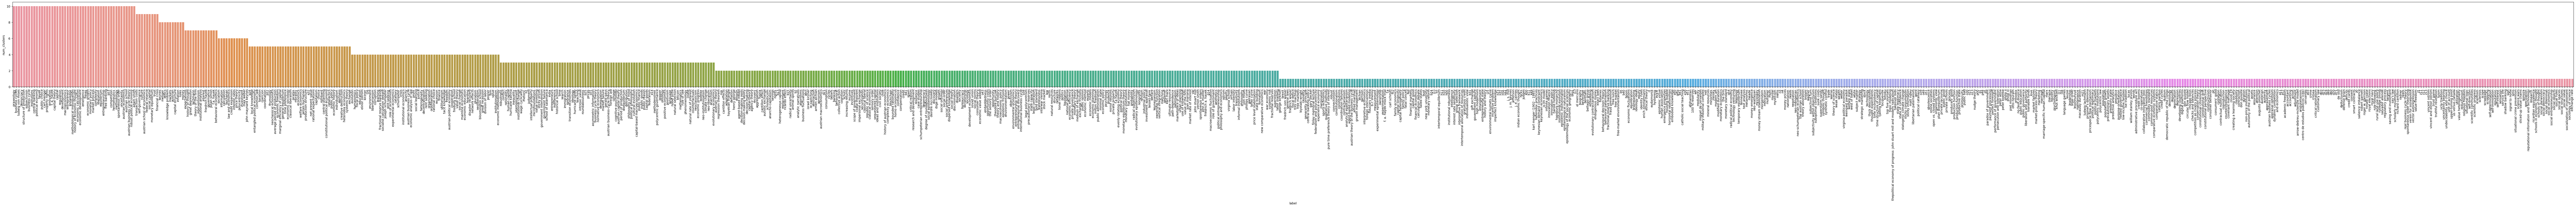

In [97]:
#plotar um grafico de barras com o numero de clusters por label
plt.figure(figsize=(150, 5))
sns.barplot(x='label', y='num_clusters', data=df_cluster_info)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.5)
plt.savefig('figure/allLabels.png')
plt.show()

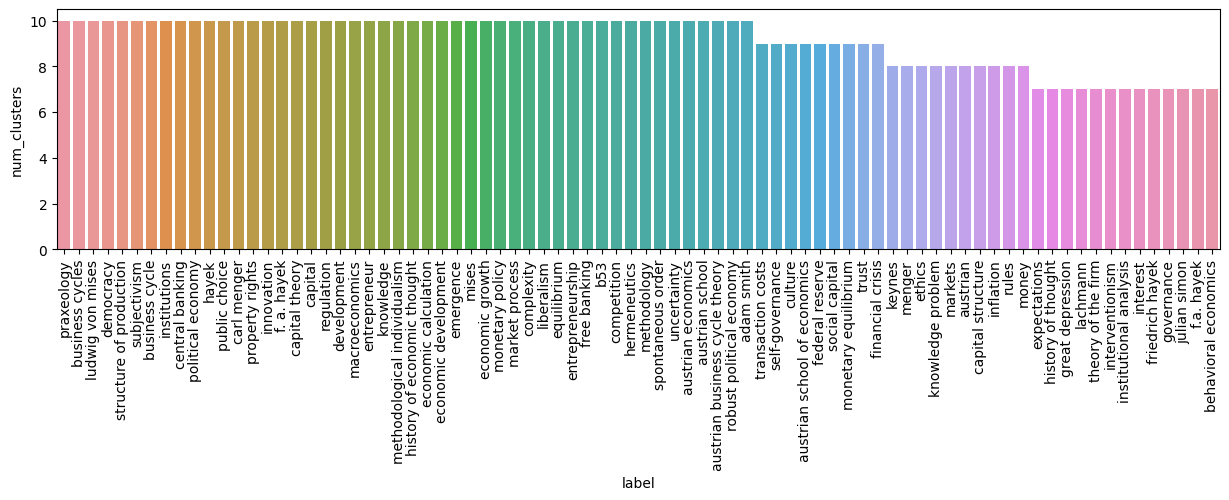

In [101]:
#dropar labels com num_clusters < 5
df_cluster_info = df_cluster_info[df_cluster_info['num_clusters'] >= 7]

#plotar um grafico de barras com o numero de clusters por label e salvar em figure/importantLabels.png
plt.figure(figsize=(15, 5))
sns.barplot(x='label', y='num_clusters', data=df_cluster_info)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.5)
plt.savefig('figure/importantLabels.png')
plt.show()
